In [35]:
# import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Importing Dataset
aspects_df = pd.read_csv('train.csv')

In [3]:
#Checking Dataset
aspects_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
aspects_df=aspects_df.drop(['id'],axis=1)

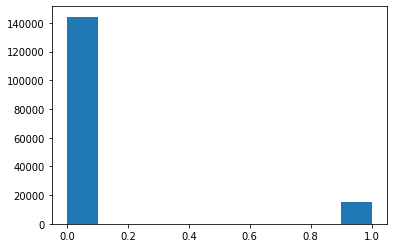

In [5]:
#Histogram Plot / Univariate Analysis
plt.hist(aspects_df['malignant'])
plt.show()

From this graph we can conclude that in our dataset people find comment malignant is very less as compare to not find malignant.

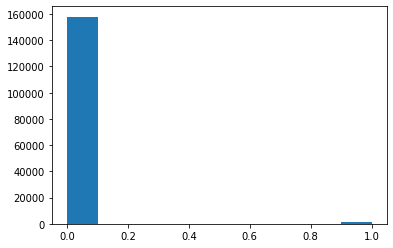

In [6]:
#Histogram Plot / Univariate Analysis
plt.hist(aspects_df['highly_malignant'])
plt.show()

From this graph we can conclude that in our dataset people find comment highly malignant is very less as compare to not find highly malignant.

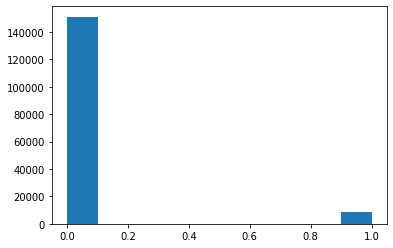

In [7]:
#Histogram Plot / Univariate Analysis
plt.hist(aspects_df['rude'])
plt.show()

From this graph we can conclude that in our dataset people find comment rude is very less as compare to not find rude.

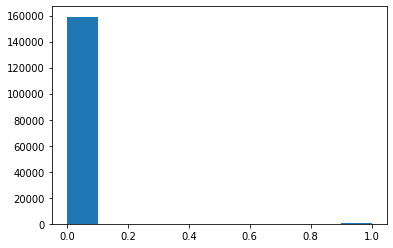

In [8]:
#Histogram Plot / Univariate Analysis
plt.hist(aspects_df['threat'])
plt.show()

From this graph we can conclude that in our dataset people find comment threat is very less as compare to not find threat.

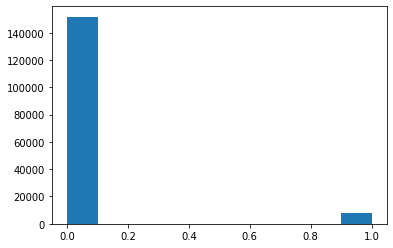

In [9]:
#Histogram Plot / Univariate Analysis
plt.hist(aspects_df['abuse'])
plt.show()

From this graph we can conclude that in our dataset people find comment abuse is very less as compare to not find abuse.

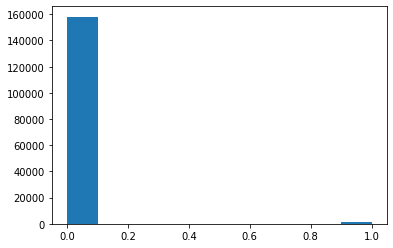

In [10]:
#Histogram Plot / Univariate Analysis
plt.hist(aspects_df['loathe'])
plt.show()

From this graph we can conclude that in our dataset people find comment loathe is very less as compare to not find loathe.

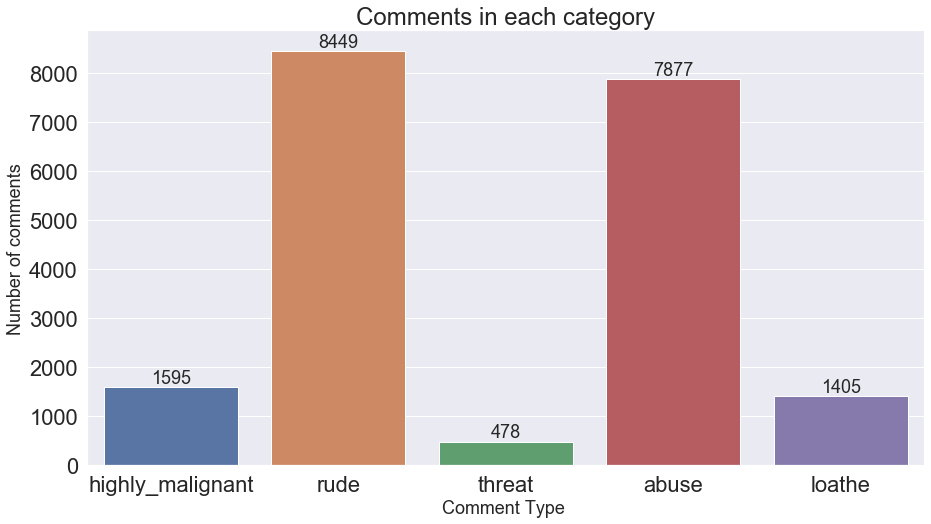

In [43]:
categories = list(aspects_df.iloc[:,2:].columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, aspects_df.iloc[:,2:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = aspects_df.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

From this graph we can observe that in our dataset maximum comments are rude while threat comment are lowest. We can also see that abusive comment are also noticable.

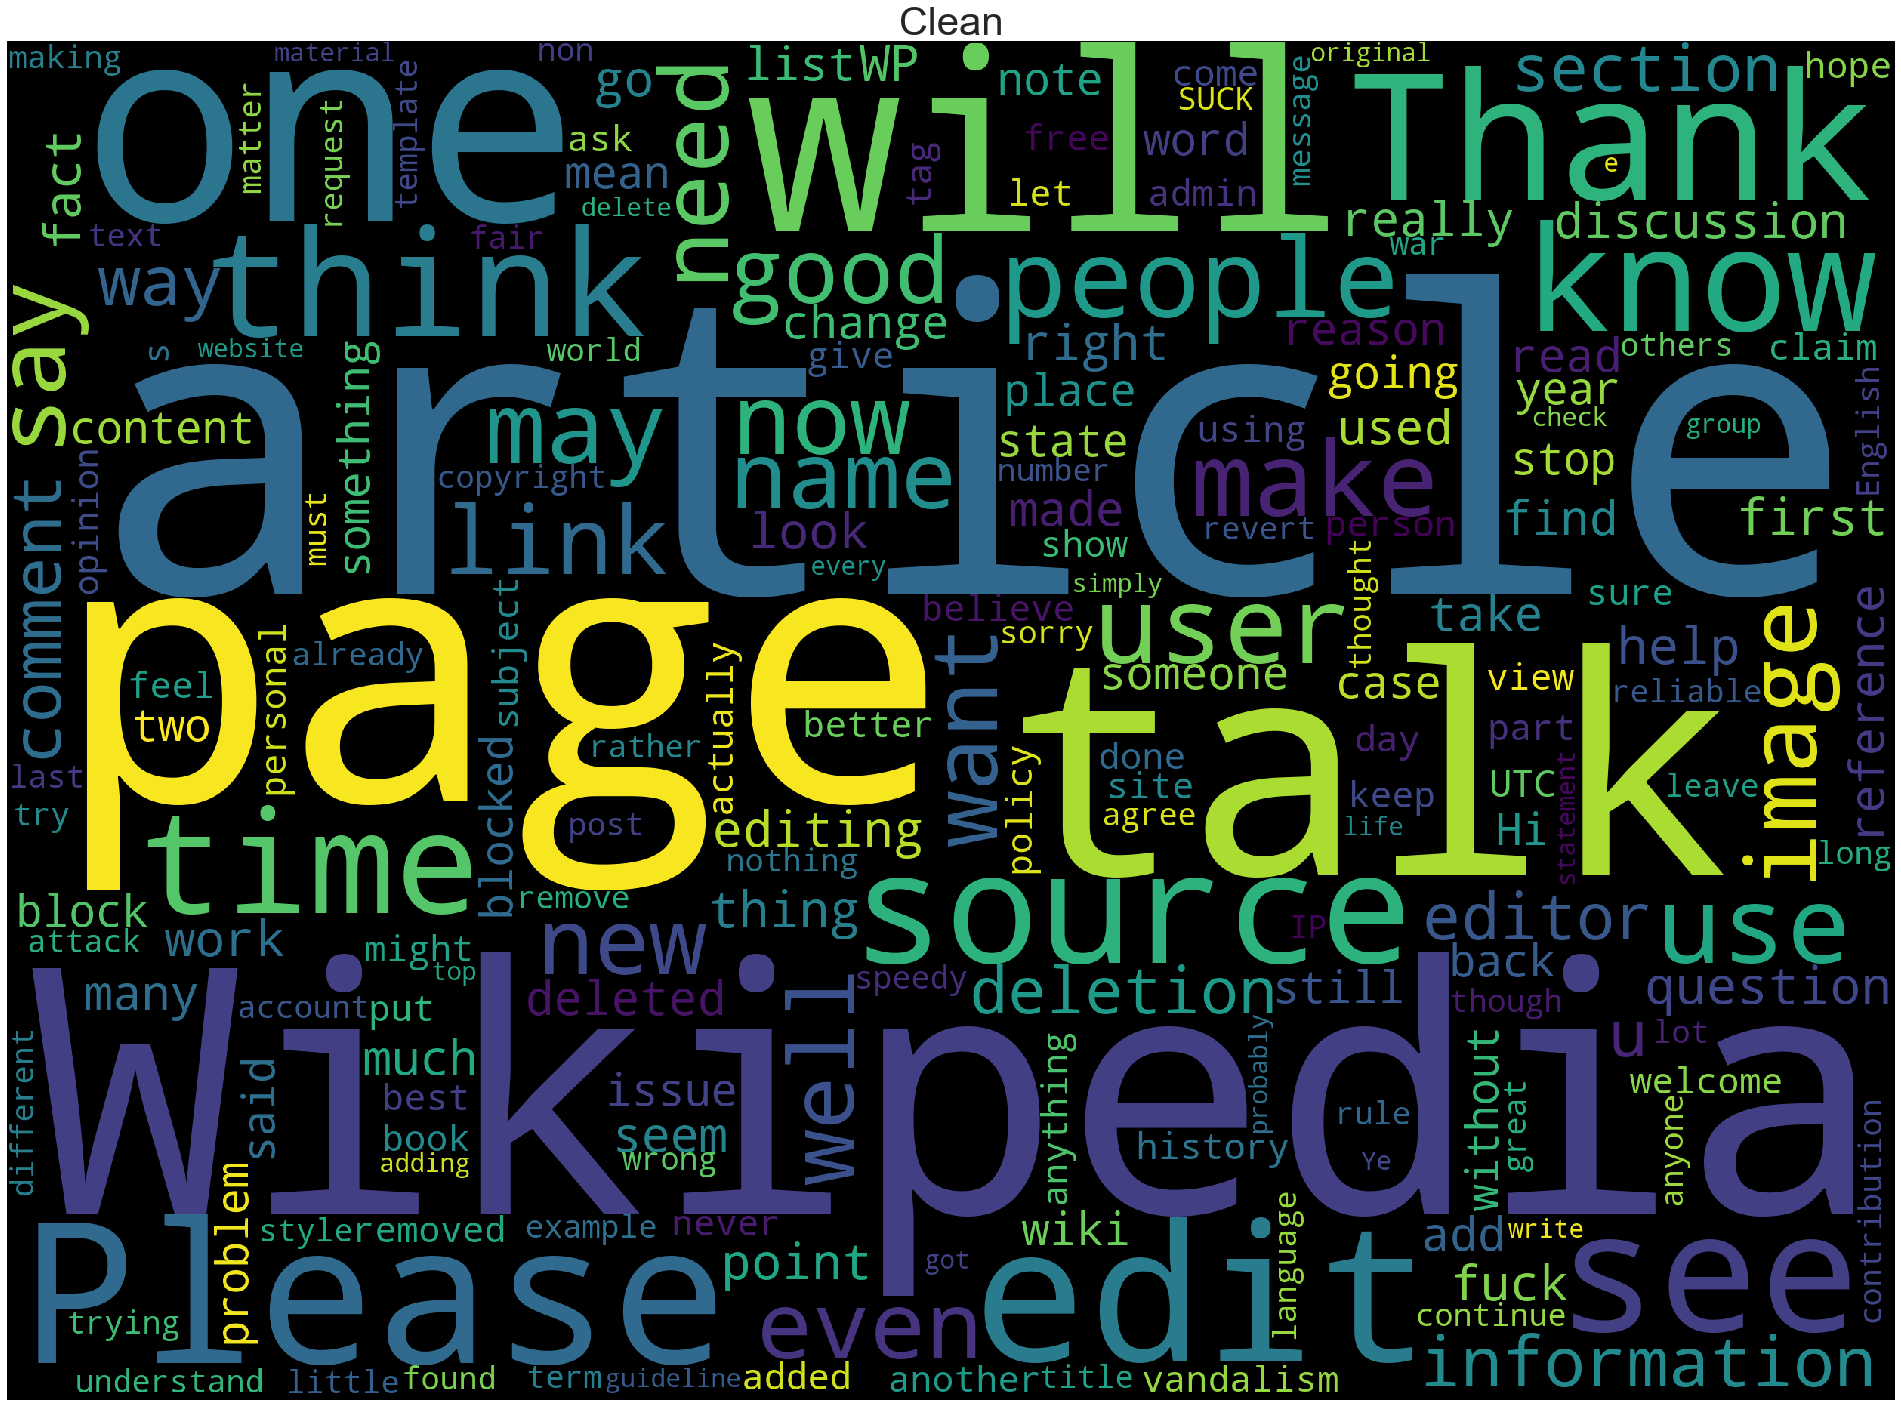

In [12]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean
subset = aspects_df
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)
# Same code can be used to generate wordclouds of other categories.


In [13]:
# making all letter in lower case
aspects_df['comment_text']=aspects_df['comment_text'].str.lower()

In [14]:
# replacing numbers with 'numbr'.
aspects_df['comment_text']= aspects_df['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')

In [15]:
# remove punctuation
aspects_df['comment_text']= aspects_df['comment_text'].str.replace(r'[^\w\d\s]',' ')

# replace whitespace between terms with single space
aspects_df['comment_text']= aspects_df['comment_text'].str.replace(r'\s+',' ')

# remove leading and trailing whitspace
aspects_df['comment_text']= aspects_df['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [16]:
# removing stopwords
import string
import nltk
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

aspects_df["comment_text"] = aspects_df["comment_text"].apply(lambda text: remove_stopwords(text))
aspects_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0


In [17]:
X = aspects_df["comment_text"]
y = np.asarray(aspects_df[aspects_df.columns[1:]])

In [18]:
# initializing TfidfVectorizer 
vetorizar = TfidfVectorizer(max_features=3000, max_df=0.85)
# fitting the tf-idf on the given data
vetorizar.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.85, max_features=3000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [19]:
# splitting the data to training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
# transforming the data
X_train_tfidf = vetorizar.transform(X_train)
X_test_tfidf = vetorizar.transform(X_test)

In [21]:
# using Multi-label kNN classifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train_tfidf, y_train)
preddtc=dtc.predict(X_test_tfidf)
print('Accuracy Score :', accuracy_score(y_test,preddtc))

Accuracy Score : 0.8951161430481284


In [22]:
df_test=pd.read_csv('test.csv')

In [23]:
df_test=df_test.drop(['id'],axis=1)

In [24]:
df_test.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [25]:
df_test.shape

(153164, 1)

In [26]:
# making all letter in lower case
df_test['comment_text']=df_test['comment_text'].str.lower()

In [27]:
# replacing numbers with 'numbr'.
df_test['comment_text']= df_test['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')

In [28]:
# remove punctuation
df_test['comment_text']= df_test['comment_text'].str.replace(r'[^\w\d\s]',' ')

# replace whitespace between terms with single space
df_test['comment_text']= df_test['comment_text'].str.replace(r'\s+',' ')

# remove leading and trailing whitspace
df_test['comment_text']= df_test['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [29]:
# removing stopwords
import string
import nltk
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_test["comment_text"] = df_test["comment_text"].apply(lambda text: remove_stopwords(text))
df_test.head()

,comment_text
0,yo bitch ja rule succesful ever whats hating s...
1,rfc title fine imo
2,sources zawe ashton lapland
3,look back source information updated correct f...
4,anonymously edit articles


In [30]:
new_sentence_tfidf = vetorizar.transform(df_test['comment_text'])
  
predicted_sentences = dtc.predict(new_sentence_tfidf)
print(predicted_sentences)

[[1 0 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]]


In [44]:
# converting predicted value into dataframe
pred=pd.DataFrame(predicted_sentences, columns=['malignant','highly malignant','rude','threat','abuse','loathe'])

In [45]:
pred.head()

,malignant,highly malignant,rude,threat,abuse,loathe
0,1,0,1,0,1,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [53]:
# combining test dataset and predicted dataframe
final_df=pd.concat([df_test,pred],axis=1)

In [54]:
final_df.head()

,comment_text,malignant,highly malignant,rude,threat,abuse,loathe
0,yo bitch ja rule succesful ever whats hating s...,1,0,1,0,1,0
1,rfc title fine imo,0,0,0,0,0,0
2,sources zawe ashton lapland,0,0,0,0,0,0
3,look back source information updated correct f...,0,0,0,0,0,0
4,anonymously edit articles,0,0,0,0,0,0


In [55]:
# Converting dataframe into excel file and storing it on desktop.
final_df.to_csv("C:\\Users\\PRIYA\\Desktop\\test.csv")